In [21]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('KOMENTRUE.csv', sep = 'delimeter')
df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys.path.


,content
0,'- ������182��������� ������������������������...
1,"""'"""" DAIHATSU SIRION """" #KuisDaihatsu #Daihat..."
2,"""'"""" SATRIA """" #SuzukiQuiz Kuy ikutan gaes d..."
3,"""'"""" SATRIA """" #SuzukiQuiz Berjalan ke atas r..."
4,"""'"""" SATRIA """" #SuzuqiQuiz #satria Armanih"""


In [22]:
df.shape

(13532, 1)

In [0]:
df['pre_clean_len'] = [len(t) for t in df.content]

In [27]:
from pprint import pprint
data_dict = {
    'content':{
        'type':df.content.dtype,
        'description':'tweet text'
    },
    'pre_clean_len':{
        'type':df.pre_clean_len.dtype,
        'description':'Length of the tweet before cleaning'
    },
    'dataset_shape':df.shape
}
pprint(data_dict)

{'content': {'description': 'tweet text', 'type': dtype('O')},
 'dataset_shape': (13532, 2),
 'pre_clean_len': {'description': 'Length of the tweet before cleaning',
                   'type': dtype('int64')}}


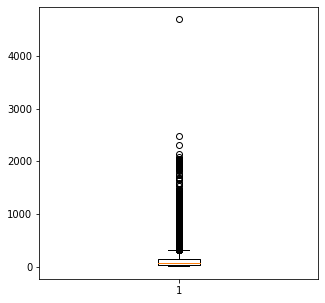

In [25]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.boxplot(df.pre_clean_len)
plt.show()

#Data Cleaning

In [66]:
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()
pat1 = r'@[A-Za-z0-9]+'
pat2 = r'https?://[A-Za-z0-9./]+'
combined_pat = r'|'.join((pat1, pat2))
def tweet_cleaner(content):
    soup = BeautifulSoup(content, 'lxml')
    souped = soup.get_text()
    stripped = re.sub(combined_pat, '', souped)
    try:
        clean = stripped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        clean = stripped
    letters_only = re.sub("[^a-zA-Z]", " ", clean)
    lower_case = letters_only.lower()
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = tok.tokenize(lower_case)
    return (" ".join(words)).strip()
content = df['content']
test_result = []
for t in content:
    test_result.append(tweet_cleaner(t))
print(test_result[:100])


['gsxr', 'daihatsu sirion kuisdaihatsu daihatsusahabatku armanih susi al faqih wadewa rara ratih sari opih nita mulyani', 'satria suzukiquiz kuy ikutan gaes di suzuki motorcycles indonesia samti rahayu novita ndut may fayza yunita susanti shee mojang suzukiindonesiamotor nyalakannyali suzukiquiz', 'satria suzukiquiz berjalan ke atas rotan liat bawah airnya kering kalau boleh sya kasih saran yuk ikut kuis nya siapa tau beruntung haemy orlando mahdian syarief yogi prayogi sugi djourou ben meshbach fyanti', 'satria suzuqiquiz satria armanih', 'satria beben bahtiar asep ruhiyat tajudin herlinawati wati wati suzukiquiz', 'jawaban no posisi yang terbuka toyota toyotafun tebaktoyota yuk ikutan follow toyotaid aniss fairuz chichy khanza novelia toyotaid', 'saaaahhh', 'begini salah begitu juga salah kek kek kek apayaa gue emang begini ada nyaa yang penting hayukkk meluncurrrr terimakasih id indonesia suzuki gsxr teamsuzuki nolanindonesia', 'enjoy every moment latepost like likes gsxr', 'gimana 

In [69]:
clean_df = pd.DataFrame(test_result, columns = ['text'])
print(clean_df.head())

                                                text
0                                               gsxr
1  daihatsu sirion kuisdaihatsu daihatsusahabatku...
2  satria suzukiquiz kuy ikutan gaes di suzuki mo...
3  satria suzukiquiz berjalan ke atas rotan liat ...
4                   satria suzuqiquiz satria armanih


In [70]:
clean_df.to_csv('clean_tweet.csv',encoding='utf-8')
csv = 'clean_tweet.csv'
my_df = pd.read_csv(csv,index_col=0)
my_df.head()

,text
0,gsxr
1,daihatsu sirion kuisdaihatsu daihatsusahabatku...
2,satria suzukiquiz kuy ikutan gaes di suzuki mo...
3,satria suzukiquiz berjalan ke atas rotan liat ...
4,satria suzuqiquiz satria armanih
